In [1]:
import pandas as pd
df=pd.read_csv('/content/gender_submission.csv')

In [3]:
df.isnull().sum()

,0
PassengerId,0
Survived,0


In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
  data[col]=encoder.fit_transform(data[col])

In [5]:
x=df.iloc[:, 0]
y=df.iloc[:, 1]

In [10]:
import numpy as np
x=np.array(x)
y=np.array(y)

In [16]:
x=x.reshape(-1, 1)
y=y.reshape(-1, 1)

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test=train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [18]:
from sklearn.linear_model import LogisticRegression

In [32]:
model=LogisticRegression(class_weight='balanced')

In [33]:
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

In [34]:
y_pred = model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.5238095238095238


In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print("Confusion Matrix:")
print("TP FP")
print("FN TN")
print(cm)

Confusion Matrix:
TP FP
FN TN
[[18 16]
 [24 26]]


In [38]:
precision = precision_score(y_test, y_pred, zero_division=0)
print("Precision:",precision)

Precision: 0.42857142857142855


In [39]:
recall = recall_score(y_test, y_pred, zero_division=0)
print("Recall:",recall)


Recall: 0.5294117647058824


In [41]:
f1 = f1_score(y_test, y_pred, zero_division=0)
print("F1 Score:",f1)

F1 Score: 0.47368421052631576


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])

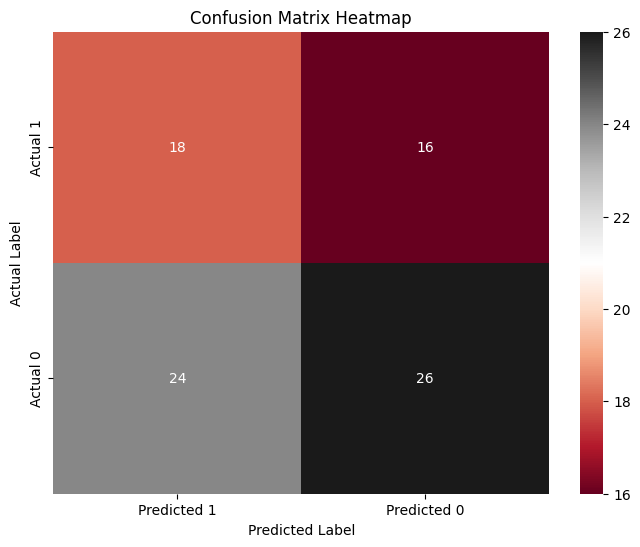

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdGy',
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [52]:
from sklearn.metrics import roc_curve, auc

In [53]:
y_prob = model.predict_proba(x_test)[:, 1]

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [55]:
roc_auc = auc(fpr, tpr)
print("ROC AUC:",roc_auc)

ROC AUC: 0.5229411764705882


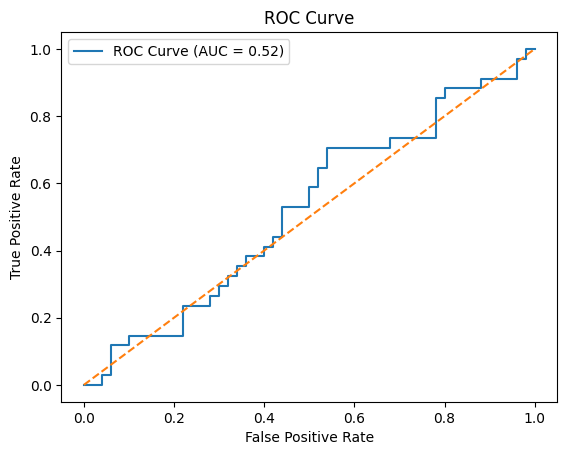

In [57]:
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()